In [1]:
import os, pickle, torch
from model_exercise1_solution import GPT
from matplotlib import pyplot as plt

In [2]:
DATA_DIR = "data/"
MODEL_DIR = "best_models/"
CHECKPOINT = "base.pt"
device = "mps"

In [3]:
checkpoint = torch.load(MODEL_DIR + CHECKPOINT, map_location=device)
config = checkpoint["config"]
model = GPT(config)
state_dict = checkpoint["model"]
unwanted_prefix = "_orig_mod."
for k, v in list(state_dict.items()):
    if k.startswith(unwanted_prefix):
        state_dict[k[len(unwanted_prefix) :]] = state_dict.pop(k)
model.load_state_dict(state_dict)
print("best val loss =", checkpoint["best_val_loss"].item())

total number of parameters: 1627650 learnable: 1627650
best val loss = 2.5930190086364746


In [4]:
with open(DATA_DIR + "meta.pkl", "rb") as f:
    meta = pickle.load(f)
stoi, itos = meta["stoi"], meta["itos"]
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: "".join([itos[i] for i in l])

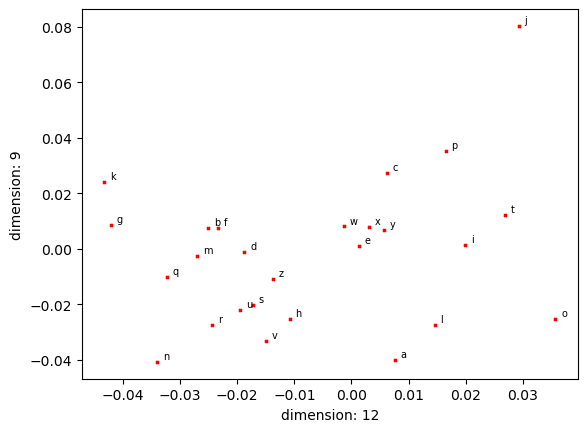

In [5]:
dims = torch.randint(config["n_embd"], (1, 2))
dim1, dim2 = dims[0, 0].item(), dims[0, 1].item()
for c_i in range(26):
    x, y = (
        model.transformer.wte.weight[c_i, dim1].item(),
        model.transformer.wte.weight[c_i, dim2].item(),
    )
    plt.scatter(x, y, marker="x", color="red", s=4)
    plt.text(x + 0.001, y + 0.001, itos[c_i], fontsize=7)
plt.xlabel("dimension: " + str(dim1))
plt.ylabel("dimension: " + str(dim2))
plt.show()

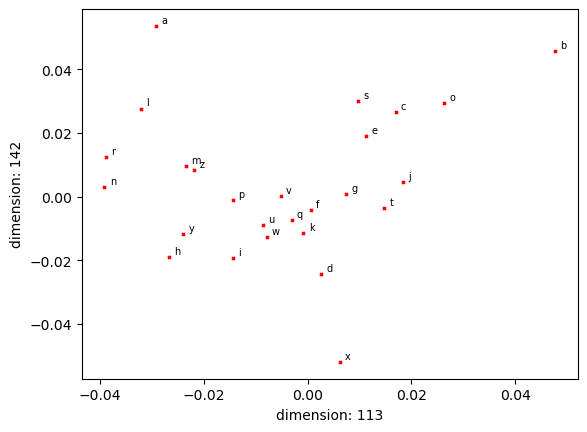

In [6]:
dims = torch.randint(config["n_embd"], (1, 2))
dim1, dim2 = dims[0, 0].item(), dims[0, 1].item()
for c_i in range(26):
    x, y = (
        model.transformer.wte.weight[c_i, dim1].item(),
        model.transformer.wte.weight[c_i, dim2].item(),
    )
    plt.scatter(x, y, marker="x", color="red", s=4)
    plt.text(x + 0.001, y + 0.001, itos[c_i], fontsize=7)
plt.xlabel("dimension: " + str(dim1))
plt.ylabel("dimension: " + str(dim2))
plt.show()

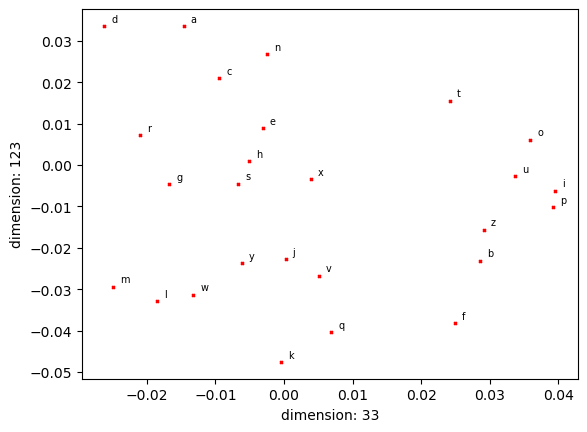

In [7]:
dims = torch.randint(config["n_embd"], (1, 2))
dim1, dim2 = dims[0, 0].item(), dims[0, 1].item()
for c_i in range(26):
    x, y = (
        model.transformer.wte.weight[c_i, dim1].item(),
        model.transformer.wte.weight[c_i, dim2].item(),
    )
    plt.scatter(x, y, marker="x", color="red", s=4)
    plt.text(x + 0.001, y + 0.001, itos[c_i], fontsize=7)
plt.xlabel("dimension: " + str(dim1))
plt.ylabel("dimension: " + str(dim2))
plt.show()

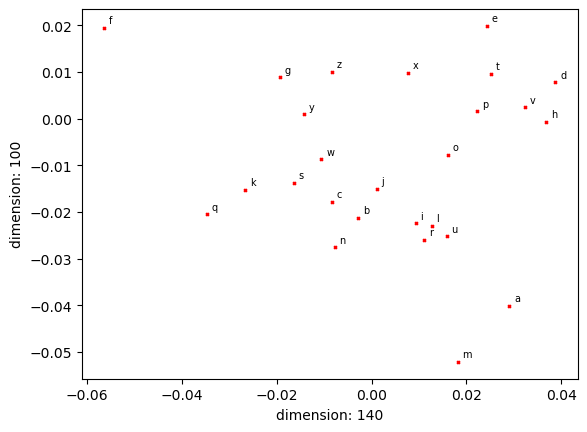

In [8]:
dims = torch.randint(config["n_embd"], (1, 2))
dim1, dim2 = dims[0, 0].item(), dims[0, 1].item()
for c_i in range(26):
    x, y = (
        model.transformer.wte.weight[c_i, dim1].item(),
        model.transformer.wte.weight[c_i, dim2].item(),
    )
    plt.scatter(x, y, marker="x", color="red", s=4)
    plt.text(x + 0.001, y + 0.001, itos[c_i], fontsize=7)
plt.xlabel("dimension: " + str(dim1))
plt.ylabel("dimension: " + str(dim2))
plt.show()

In [9]:
for c_i in range(26):
    sim = {}
    for c_j in range(26):
        if c_j == c_i:
            continue
        sim[c_j] = round(
            torch.dot(
                model.transformer.wte.weight[c_i], model.transformer.wte.weight[c_j]
            ).item(),
            2,
        )
    sim = sorted(sim.items(), key=lambda item: item[1], reverse=True)
    print(
        "similar chars to "
        + itos[c_i]
        + ": "
        + itos[sim[0][0]]
        + "("
        + str(sim[0][1])
        + ")"
        + ", "
        + itos[sim[1][0]]
        + "("
        + str(sim[1][1])
        + ")"
        + ", "
        + itos[sim[2][0]]
        + "("
        + str(sim[2][1])
        + ")"
    )

similar chars to a: e(0.03), i(0.03), h(0.02)
similar chars to b: s(0.02), c(0.01), f(0.01)
similar chars to c: b(0.01), d(0.01), j(0.01)
similar chars to d: s(0.02), c(0.01), e(0.01)
similar chars to e: a(0.03), i(0.03), o(0.03)
similar chars to f: b(0.01), g(0.01), j(0.01)
similar chars to g: j(0.02), d(0.01), f(0.01)
similar chars to h: a(0.02), r(0.02), i(0.01)
similar chars to i: o(0.04), a(0.03), e(0.03)
similar chars to j: g(0.02), p(0.02), b(0.01)
similar chars to k: b(0.01), f(0.01), g(0.01)
similar chars to l: n(0.02), r(0.02), a(0.01)
similar chars to m: n(0.02), r(0.02), s(0.02)
similar chars to n: l(0.02), m(0.02), b(0.01)
similar chars to o: i(0.04), e(0.03), a(0.02)
similar chars to p: j(0.02), x(0.02), c(0.01)
similar chars to q: w(0.02), b(0.01), f(0.01)
similar chars to r: h(0.02), l(0.02), m(0.02)
similar chars to s: b(0.02), d(0.02), m(0.02)
similar chars to t: c(0.01), d(0.01), l(0.01)
similar chars to u: a(0.02), i(0.02), o(0.02)
similar chars to v: x(0.02), z(0.0

In [10]:
stoi["{"], stoi["}"]

(27, 28)

In [11]:
for c_i in [27, 28]:
    sim = {}
    for c_j in range(26):
        if c_j == c_i:
            continue
        sim[c_j] = round(
            torch.dot(
                model.transformer.wte.weight[c_i], model.transformer.wte.weight[c_j]
            ).item(),
            2,
        )
    sim = sorted(sim.items(), key=lambda item: item[1], reverse=True)
    print(
        "similar chars to "
        + itos[c_i]
        + ": "
        + itos[sim[0][0]]
        + "("
        + str(sim[0][1])
        + ")"
        + ", "
        + itos[sim[1][0]]
        + "("
        + str(sim[1][1])
        + ")"
        + ", "
        + itos[sim[2][0]]
        + "("
        + str(sim[2][1])
        + ")"
    )

similar chars to {: f(0.01), q(0.01), v(0.01)
similar chars to }: n(0.02), a(0.01), i(0.01)
